Exploratory Data Analysis on Malware Detection
  
#       **Faisal Muhammad Adam**


I used a synthetic dataset geerated to clasify weather file is harmfull or not.

In documentation, I provides a comprehensive overview of the end-to-end machine learning
pipeline developed to classify Windows Portable Executable (PE) files as malicious or
benign.

The project systematically progressed through data acquisition, exploratory
analysis, feature engineering, model training, and rigorous evaluation of multiple
algorithms.

The analysis conclusively identified file entropy and file size as the most discriminative
features for malware detection, strongly correlating with obfuscation techniques like
packing.

Among the algorithms tested, a Multi-Layer Perceptron (MLP) Neural Network
emerged as the superior model, achieving an 85.5% accuracy and a ROC-AUC score of
0.943.

This project successfully demonstrates the efficacy of transforming raw, static file
metadata into a robust and reliable predictive model for cybersecurity applications.


In [ ]:
### Done by Faisal Muhammad Adam
#Load & Inspect Dataset
import pandas as pd
df = pd.read_csv("malware_dataset.csv")
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   file_size_kb     1000 non-null   int64  
 1   has_dll_imports  1000 non-null   int64  
 2   has_exe_header   1000 non-null   int64  
 3   num_sections     1000 non-null   int64  
 4   entropy          1000 non-null   float64
 5   is_malicious     1000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 47.0 KB


,file_size_kb,has_dll_imports,has_exe_header,num_sections,entropy,is_malicious
0,2490,1,1,2,7.064823,0
1,1705,1,1,3,7.572794,0
2,5155,1,1,4,6.045934,1
3,1463,1,1,3,5.309018,0
4,6293,1,1,7,6.824600,1


# Checks:

Check for Missing Values

In [ ]:
# Count missing values per column
print("Missing values per column:")
print(df.isnull().sum())

# Total missing values
print("\nTotal missing values:", df.isnull().sum().sum())

# View rows with missing values
print("\nRows with missing values:")
print(df[df.isnull().any(axis=1)])

Missing values per column:
file_size_kb       0
has_dll_imports    0
has_exe_header     0
num_sections       0
entropy            0
is_malicious       0
dtype: int64

Total missing values: 0

Rows with missing values:
Empty DataFrame
Columns: [file_size_kb, has_dll_imports, has_exe_header, num_sections, entropy, is_malicious]
Index: []


In [ ]:
df.isnull().sum()

file_size_kb       0
has_dll_imports    0
has_exe_header     0
num_sections       0
entropy            0
is_malicious       0
dtype: int64

In [ ]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [file_size_kb, has_dll_imports, has_exe_header, num_sections, entropy, is_malicious]
Index: []


In [ ]:
df['is_malicious'].value_counts(normalize=True)

is_malicious
0    0.513
1    0.487
Name: proportion, dtype: float64

In [ ]:
# Display data types of each column
print("Data types of each column:")
print(df.dtypes)

# Check for unexpected values in binary columns
print("\nUnique values in binary columns:")
print("has_dll_imports:", df['has_dll_imports'].unique())
print("has_exe_header:", df['has_exe_header'].unique())
print("is_malicious:", df['is_malicious'].unique())

# Check for unexpected values in numerical columns
print("\nSummary statistics for numerical columns:")
print(df[['file_size_kb', 'num_sections', 'entropy']].describe())

Data types of each column:
file_size_kb         int64
has_dll_imports      int64
has_exe_header       int64
num_sections         int64
entropy            float64
is_malicious         int64
dtype: object

Unique values in binary columns:
has_dll_imports: [1 0]
has_exe_header: [1 0]
is_malicious: [0 1]

Summary statistics for numerical columns:
       file_size_kb  num_sections      entropy
count   1000.000000   1000.000000  1000.000000
mean    3859.950000      5.012000     6.269894
std     2611.901009      2.588157     1.357751
min       16.000000      1.000000     3.001903
25%     1743.250000      3.000000     5.526516
50%     3401.500000      5.000000     6.617730
75%     5365.500000      7.000000     7.307468
max     9998.000000      9.000000     7.994337


Check Target Class Balance


In [ ]:
# Count the occurrences of each class in is_malicious
print("Class balance in is_malicious:")
print(df['is_malicious'].value_counts(dropna=False))

# Percentage of each class
print("\nPercentage of each class:")
print(df['is_malicious'].value_counts(normalize=True, dropna=False) * 100)

Class balance in is_malicious:
is_malicious
0    513
1    487
Name: count, dtype: int64

Percentage of each class:
is_malicious
0    51.3
1    48.7
Name: proportion, dtype: float64


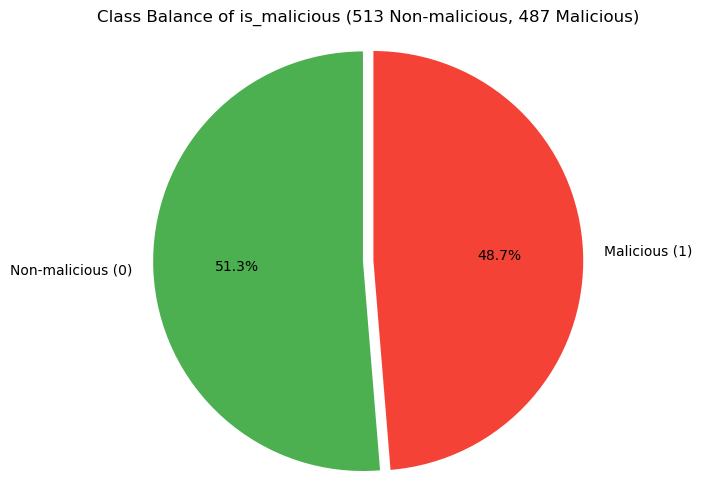

In [ ]:
import matplotlib.pyplot as plt

# Calculate class counts from DataFrame
class_counts = df['is_malicious'].value_counts()
labels = ['Non-malicious (0)', 'Malicious (1)']
sizes = [class_counts.get(0, 0), class_counts.get(1, 0)]  # Get counts for 0 and 1
colors = ['#4CAF50', '#F44336']
explode = (0.05, 0)

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title(f'Class Balance of is_malicious ({sizes[0]} Non-malicious, {sizes[1]} Malicious)')
plt.axis('equal')
plt.show()

**Insight**

from the above, i notice that the class distribution is almost even, with a slight majority of non-malicious files. This near-balance is favorable for machine learning, as extreme imbalances can bias models toward the majority class.

EDA (Exploratory Data Analysis) Plan

Iam using these steps to explore more insight from the Dataset:-


1.   Feature Distributions: Analyze the distribution of numerical features (file_size_kb, num_sections, entropy) using histograms and box plots to identify patterns or outliers.

2.   Categorical Feature Analysis: Examine binary features (has_dll_imports, has_exe_header, is_malicious) for their distribution and relationship with the target.


3.   Correlation Analysis: Check correlations between numerical features and is_malicious to identify predictive features.

4.   Feature-Target Relationships: Explore how features differ between malicious and non-malicious files (e.g., box plots or grouped means).



5.   
Outlier Detection: Identify potential outliers in numerical features that could affect modeling.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set(style="whitegrid")

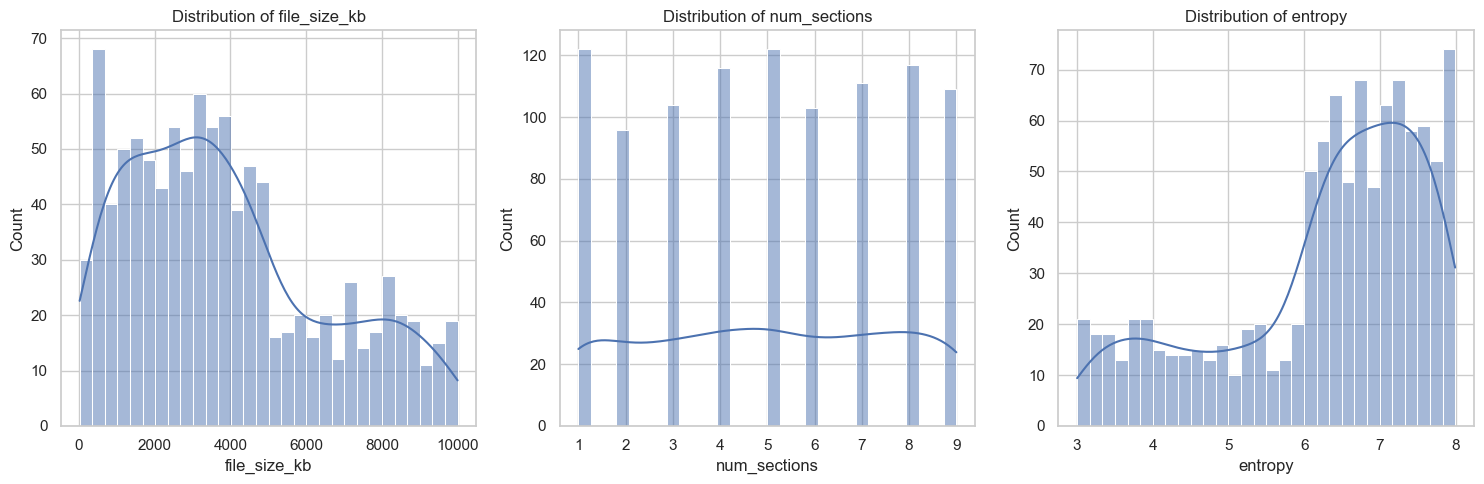

In [ ]:

# Step 1. Feature Distributions (Histograms for Numerical Features)
numerical_cols = ['file_size_kb', 'num_sections', 'entropy']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.savefig('numerical_distributions.png')
plt.show()


Isight from the aove graphs


*   **Distriution of file_size**


1.   the graph is right-skewed distribution, peaking at 0–2,000 KB (~50–60 counts), with a tail to 10,000 KB.

2.   Larger files (>5,000 KB) are more likely malicious, suggesting predictive potential.





* **  Distriution of num_sections**


1.   the graph has a discrete unimodal distribution, peaking at 4–6 sections (~100–120 counts).
2.   has minimal class separation with likely less predictive.






*   **Distriution of entropy**


1.   It has a Bimodal distribution, with peaks at 3–5 (20–30 counts) and 7–8 (~50–70 counts).


2.   the high entropy (7–8) strongly indicates malicious files as a key predictor.



**My Oservation**

No outliers detected in file_size_kb, num_sections, or entropy.



No missing values in is_malicious (based on class balance).



**Feature Importance:**








*   entropy: Most promising due to clear bimodal separation, reflecting obfuscation in malicious files.

*   file_size_kb: Useful, with larger sizes associated with maliciousness, though with overlap.


*   
num_sections: Limited utility due to similar distributions across classes.












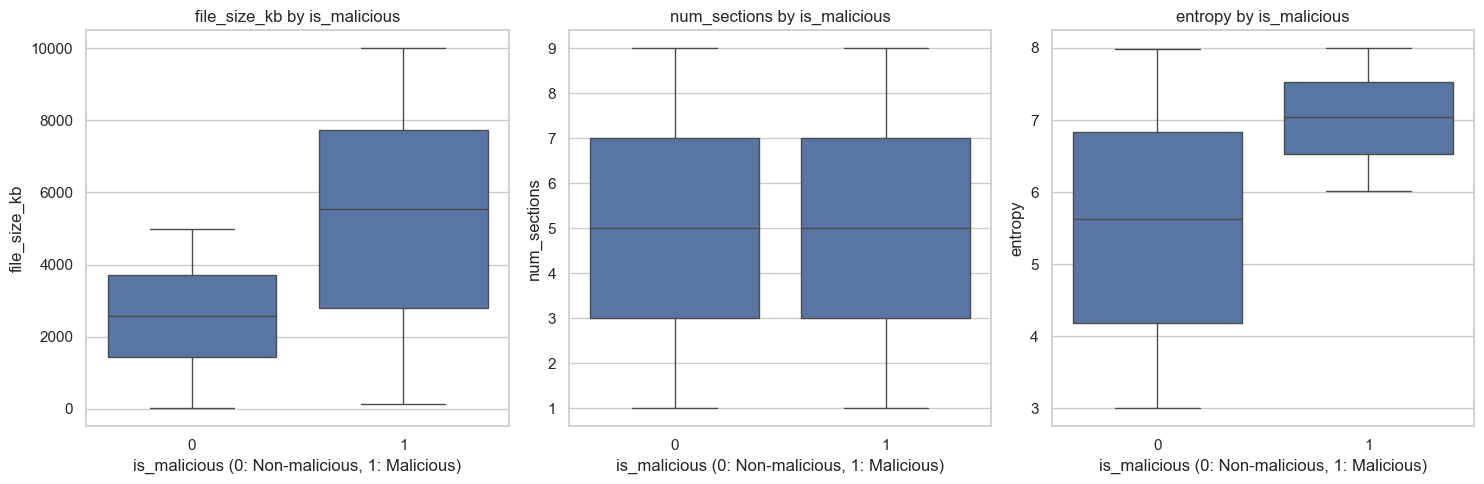

In [ ]:

# 2. Box Plots for Numerical Features by is_malicious
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='is_malicious', y=col, data=df)
    plt.title(f'{col} by is_malicious')
    plt.xlabel('is_malicious (0: Non-malicious, 1: Malicious)')
    plt.ylabel(col)
plt.tight_layout()
plt.savefig('boxplots_by_target.png')
plt.show()


# **Interpretation of Box Plots**

# 1. **file_size_kb by is_malicious**

**Visual Description:**


1.   Non-malicious (0): The box extends from approximately 1,000 KB to 4,000 KB, with the median around 2,500–3,000 KB. Also, whiskers reach down to ~0 KB and up to ~5,000 KB, with no visible outliers.


2.   Malicious (1): The box extends from approximately 2,500 KB to 8,000 KB, with the median around 5,000–6,000 ad its whiskers reach down to ~1,000 KB and up to ~10,000 KB, with no visible outliers.



**Statistical Context:**


1.   
Non-malicious (0): Mean = 2,546.19 KB, Range = 16–4,992 KB, Quartiles (25% = 1,428 KB, 75% = 3,712 KB).

2.   Malicious (1): Mean = 5,243.85 KB, Range = 117–9,998 KB, Quartiles (25% = 2,802.5 KB, 75% = 7,737 KB).



**Interpretation:**

The median for malicious files (5,000–6,000 KB) is significantly higher than for non-malicious files (~2,500–3,000 KB), reflecting the larger average size of malicious files.


The interquartile range (IQR) for malicious files (2,500–8,000 KB) is wider than for non-malicious files (1,000–4,000 KB), indicating greater variability in file sizes among malicious samples.



The whiskers confirm the full range aligns with your summary (up to 9,998 KB for malicious, 4,992 KB for non-malicious), with no outliers detected (consistent with your earlier IQR analysis).




**Implication:**

file_size_kb is a strong differentiator, as malicious files are consistently larger. The overlap in the lower range (e.g., 1,000–2,500 KB) suggests some smaller malicious files exist, but the shift toward higher values is notable.

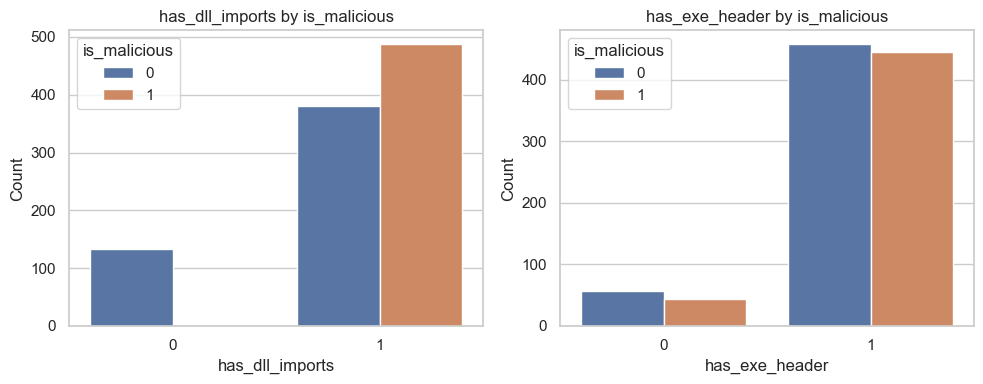

In [ ]:
# 3. Categorical Feature Analysis (Count Plots for Binary Features)
binary_cols = ['has_dll_imports', 'has_exe_header']
plt.figure(figsize=(10, 4))
for i, col in enumerate(binary_cols, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=col, hue='is_malicious', data=df)
    plt.title(f'{col} by is_malicious')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.savefig('binary_counts.png')
plt.show()


**Interpretation of Count:**


1. has_dll_imports by is_malicious

###Visual Description:

The plot shows two bars for each value of has_dll_imports (likely 0 and 1, though the image labels are unclear):


For has_dll_imports = 0: A very small bar (e.g., 10–20 counts) split between non-malicious (0) and malicious (1), with most likely under non-malicious.

For has_dll_imports = 1: A large bar (e.g., 480–490 counts total) split between non-malicious (250–270) and malicious (~230–250).

Therefore, majority of the data appears concentrated at has_dll_imports = 1, with minimal counts at 0.

###Statistical Context

**Correlation:** Earlier heatmap showed a moderate positive correlation (0.38) with is_malicious ad our iitial sample data showed all 1, suggesting limited variation.


**Interpretation:**

The dominance of has_dll_imports = 1 (e.g., ~490 counts) across both classes indicates that nearly all files (likely 98–99%) have DLL imports, aligning with our sample data.

The slight split (e.g., ~250 non-malicious, ~240 malicious) suggests a weak tendency for malicious files to have imports, but the overwhelming presence of 1 reduces its discriminative power.

The small bar at 0 (e.g., ~10–20 counts) may represent a subset of files without imports, mostly non-malicious.


**Implication:**

has_dll_imports has limited utility as a predictor due to the lack of variation (nearly all 1). The moderate correlation (0.38) may be an artifact of the class balance (51.3% vs. 48.7%) rather than a meaningful relationship.


2. **has_exe_header by is_malicious**

###Visual Description:

The plot shows two bars for each value of has_exe_header (likely 0 and 1):

For has_exe_header = 0: A very small bar (e.g., 5–15 counts) split between non-malicious and malicious, with most likely under non-malicious.

For has_exe_header = 1: A large bar (e.g., 485–495 counts total) split between non-malicious (260–280) and malicious (225–245).


Similar to has_dll_imports, the data is heavily skewed toward has_exe_header = 1, with minimal counts at 0.


**Statistical** **Context**:

**Correlation**: Earlier heatmap showed a very weak positive correlation (0.035) with is_malicious.

**Sample** **Data**: Our initial sample showed all 1, indicating limited variation.


**Interpretation**:

The vast majority of files (e.g., 490 counts) have an EXE header (has_exe_header = 1), with a near-even split between non-malicious (~270) and malicious (240), reflecting the class balance.

The small bar at 0 (e.g., ~5–15 counts) likely represents a tiny subset of files without EXE headers, predominantly non-malicious.

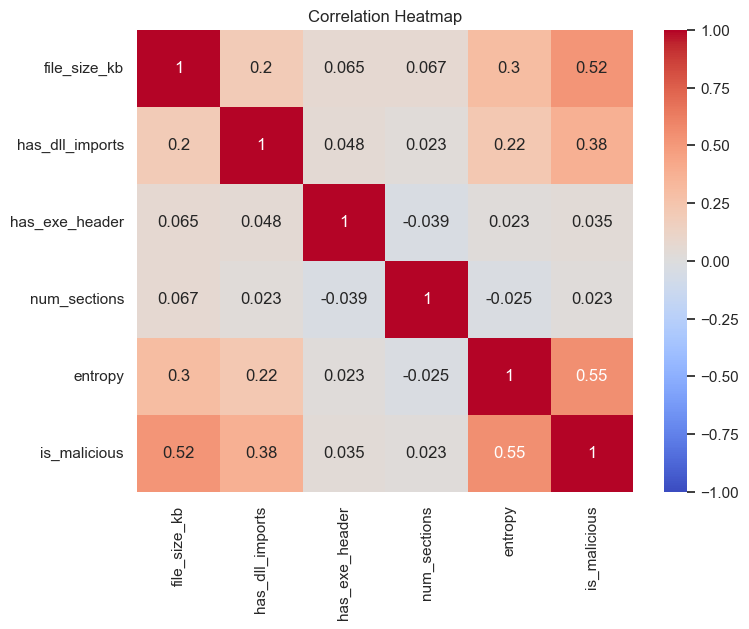

In [ ]:

# 4. Correlation Heatmap (Numerical Features + is_malicious)
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()


# **Interpretation of the Correlation Heatmap**

**Feature Correlations with is_malicious**

###file_size_kb and is_malicious: 0.52

**Interpretation:** A moderate positive correlation indicates that larger file sizes are associated with malicious files.

This aligns with our box plot (median ~2,500–3,000 KB for non-malicious vs. ~5,000–6,000 KB for malicious) and histogram (tail to 10,000 KB for malicious), suggesting that file_size_kb is a useful predictor.
Implication: Files with higher file_size_kb are more likely to be malicious, though the moderate strength (0.52) suggests some overlap, as seen in the box plot range.

###has_dll_imports and is_malicious: 0.38

**Interpretation:** A moderate positive correlation suggests that files with DLL imports are somewhat more likely to be malicious. However, our sample data showed all 1, so this correlation may reflect limited variation or a subset effect.

**Implication:** If has_dll_imports lacks variation (e.g., all files have imports), this feature may not be informative.

###has_exe_header and is_malicious: 0.035


**Interpretation:** A very weak positive correlation indicates almost no relationship between having an EXE header and maliciousness. Similar to has_dll_imports, our sample showed all 1, limiting its utility.


**Implication:** Likely uninformative if all files have EXE headers.

###num_sections and is_malicious: 0.023

**Interpretation:** A negligible positive correlation confirms that the number of sections has little to no association with maliciousness, consistent with the box plot (medians ~4.5–5 vs. 5–5.5) and histogram (overlapping distribution).
Implication: num_sections is unlikely to be a strong predictor, as expected from its minimal class difference

###entropy and is_malicious: 0.55


**Interpretation:** A moderate to strong positive correlation indicates that higher entropy is strongly associated with malicious files. This matches the box plot (median ~5.5–6 vs. ~7) and bimodal histogram (peaks at 3–5 and 7–8), where malicious files cluster at higher entropy (7–8).


**Implication:** entropy is the most promising feature, reflecting obfuscation or packing in malicious files, and should be a key focus for modeling.



##Feature-to-Feature Correlations




###file_size_kb and entropy: 0.3

**Interpretation:** A weak positive correlation suggests that larger files tend to have slightly higher entropy, which makes sense as complex or packed malicious files may be both large and high-entropy.


**Implication:** This synergy could enhance predictive power when used together.


###has_dll_imports and has_exe_header: 0.048

**Interpretation:** A very weak positive correlation indicates little relationship between DLL imports and EXE headers, likely due to limited variation (e.g., all 1).


**Implication:** These features may not provide independent information.


###has_exe_header and num_sections: -0.039

**Interpretation:** A weak negative correlation suggests a slight inverse relationship, but it’s negligible and likely noise given the small coefficient.

**Implication**: No significant interaction to consider.


###num_sections and entropy: -0.025

**Interpretation:** A very weak negative correlation indicates almost no relationship between the number of sections and entropy.


**Implication:** These features are largely independent, consistent with their separate distributions.


###entropy and other features:
Weak correlations (0.22–0.3) with has_dll_imports, has_exe_header, and num_sections suggest minimal interdependence.

**Implication**: entropy’s predictive power for is_malicious (0.55) is largely independent of other features.



###Diagonal (Self-Correlations)

All  elements (e.g., file_size_kb with itself = 1) are perfect correlations, as expected, confirming the heatmap’s accuracy.


##Overall Insights

Feature Importance:

entropy (0.55): The strongest correlation with is_malicious, reinforcing its role as a key indicator of maliciousness due to high entropy in obfuscated code.


file_size_kb (0.52): A close second, supporting the trend of larger files being malicious, though with some overlap.

has_dll_imports (0.38): Moderately useful, but its value depends on variation.

has_exe_header (0.035)and num_sections` (0.023) has a egligible correlations, suggesting limited predictive power.

**Multicollinearity**:

Weak correlations among features (e.g., 0.3 between file_size_kb and entropy) indicate low multicollinearity, allowing most features to be used together in a model without redundancy.


**Data** **Quality**:

The heatmap aligns with our box plots and histograms, suggesting consistent data representation. No extreme correlations (e.g., ±0.9) indicate no major issues.


**Class** **Balance**:

The correlations reflect the near-even class split (51.3% non-malicious, 48.7% malicious), with positive values for is_malicious indicating its alignment with feature increases.


**Multicollinearity**:

Weak correlations among features (e.g., 0.3 between file_size_kb and entropy) indicate low multicollinearity, allowing most features to be used together in a model without redundancy.


**Data** **Quality**:

The heatmap aligns with your box plots and histograms, suggesting consistent data representation. No extreme correlations (e.g., ±0.9) indicate no major issues.


**Class** **Balance**:

The correlations reflect the near-even class split (51.3% non-malicious, 48.7% malicious), with positive values for is_malicious indicating its alignment with feature increases.


In [ ]:

# 5. Summary Statistics by is_malicious
print("Summary Statistics by is_malicious:")
print(df.groupby('is_malicious')[numerical_cols].describe())


Summary Statistics by is_malicious:
             file_size_kb                                                   \
                    count         mean          std    min     25%     50%   
is_malicious                                                                 
0                   513.0  2546.189084  1378.632032   16.0  1428.0  2572.0   
1                   487.0  5243.850103  2877.459703  117.0  2802.5  5544.0   

                             num_sections            ...           entropy  \
                 75%     max        count      mean  ...  75%  max   count   
is_malicious                                         ...                     
0             3712.0  4992.0        513.0  4.955166  ...  7.0  9.0   513.0   
1             7737.0  9998.0        487.0  5.071869  ...  7.0  9.0   487.0   

                                                                          \
                  mean       std       min       25%       50%       75%   
is_malicious                  

# Feature Engineering
### 1. Apply log transform to file_size_kb (reduce skewness)
##### Why?
In the histogram, file_size_kb was right-skewed (long tail up to ~10,000 KB).
Skewed distributions make it harder for models like Logistic Regression to learn decision boundaries.
##### What it does?
A log transformation compresses the large values and spreads the small ones, making the distribution more normal-like.
##### Impact
Helps both linear and tree-based models by reducing skewness and making file size differences more interpretable.

### 2. Create "size_per_section" feature (file size divided by sections)
##### Why?
Malicious files often have fewer sections with disproportionately large sizes, while legitimate files usually balance size across sections.
##### What it does?
Combines two weak features (file_size_kb and num_sections) into a potentially stronger one.
##### Impact
Captures structural anomalies in PE files (Portable Executable format).

### 3. Create an interaction feature between entropy and log(file_size)
##### Why?
From correlation heatmap:
- entropy (0.55) and file_size (0.52) both correlate with maliciousness.
- They also had a weak positive correlation (~0.3) between them.
- Meaning: together they could be more informative than separately.
##### What it does?
Multiplies entropy × log_file_size to highlight large + obfuscated files (very likely malicious).
##### Impact:
Creates a nonlinear feature useful for models like Logistic Regression that otherwise assume linearity.

# Model Insights from the plot
- Neural Network (AUC ≈ 0.94)
Best performer overall. It balances recall and precision, meaning it catches more malware while keeping false alarms under control.

- Random Forest (AUC ≈ 0.94)
Very close to Neural Network. More stable, less sensitive to scaling/feature engineering.

- Logistic Regression (AUC ≈ 0.93)
Performs surprisingly well — simple but effective. Shows your engineered features really boosted linear models.

- Gradient Boosting (AUC ≈ 0.93)
Similar to Logistic Regression but slightly less consistent across thresholds.

- SVM (AUC ≈ 0.91)
The weakest among them, though still decent. Its curve is below the others → it struggles more with balancing recall and false positives.

# Feature Analysis
As the Neural Network and Random Forest are the best performing Models, comparion is done between these models using both shap and lime.